In [1]:
import pandas as pd
import sys
sys.path.append("../")
from src import soporte_clustering as sc


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/cooked/datos_preprocesamiento.csv', encoding='ISO-8859-1', index_col=0)

# Clusterización

In [3]:
GestorCluster = sc.Clustering(df)

In [4]:
df

,Order Date,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Order Priority,Profit_respuesta
0,0.000565,0.052661,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,15.833395,0.076662,762.1845
1,0.000858,0.200994,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,15.659911,0.076662,-288.7650
2,0.000565,0.146325,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,10.108857,2.423903,-0.202129,15.517842,0.573855,919.9710
3,0.000702,0.146325,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,5.427057,0.668550,-0.202129,15.424817,0.573855,-96.5400
4,0.001228,0.052661,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,5.304919,1.985065,-0.673210,15.300550,0.076662,311.5200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,0.000994,0.052661,0.300819,0.000078,0.000117,0.004874,0.214506,0.045584,0.000097,0.609729,0.047183,0.000351,-0.372037,0.668550,-0.673210,-0.460168,0.573855,4.5000
51286,0.001053,0.600019,0.517021,0.007350,0.019205,0.194853,0.194853,0.216748,0.000078,0.609729,0.034217,0.000078,-0.504648,-1.086803,3.095436,-0.460168,0.573855,-1.1100
51287,0.001189,0.052661,0.182160,0.000175,0.039013,0.194853,0.194853,0.062449,0.000156,0.609729,0.047475,0.000156,-0.458549,-0.209126,-0.673210,-0.460168,0.302223,11.2308
51288,0.000429,0.600019,0.182160,0.000175,0.007974,0.031176,0.200702,0.129557,0.000175,0.609729,0.119945,0.000702,-0.477993,-0.647964,-0.673210,-0.460343,0.573855,2.4000


## KMeans

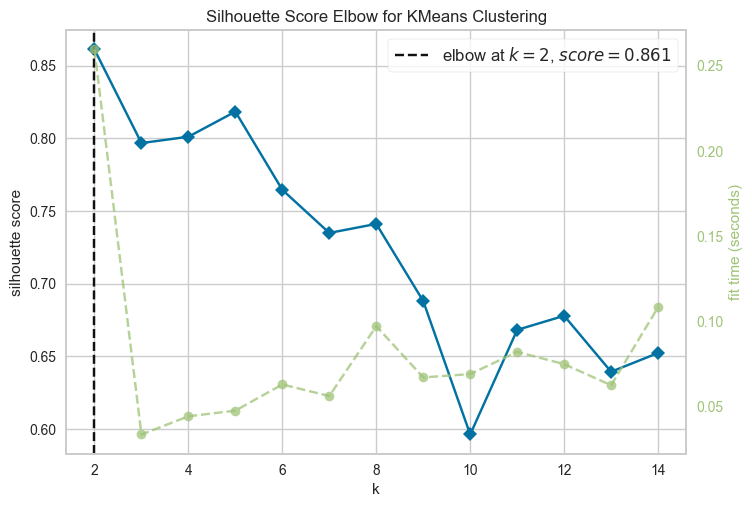

In [5]:
# GestorCluster.sacar_clusters_kmeans()

> Decido quedarme con 4 clusters en relacion a la distancia a su anterior

In [6]:
df_kmeans, labels  = GestorCluster.modelo_kmeans(df, 4)

df_kmeans.head(2)

,Order Date,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Order Priority,Profit_respuesta,clusters_kmeans
0,0.000565,0.052661,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,15.833395,0.076662,762.1845,2
1,0.000858,0.200994,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,15.659911,0.076662,-288.7650,1


In [7]:
GestorCluster.calcular_metricas(labels=labels)

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.809566,0.541779,509


## Aglomerativo

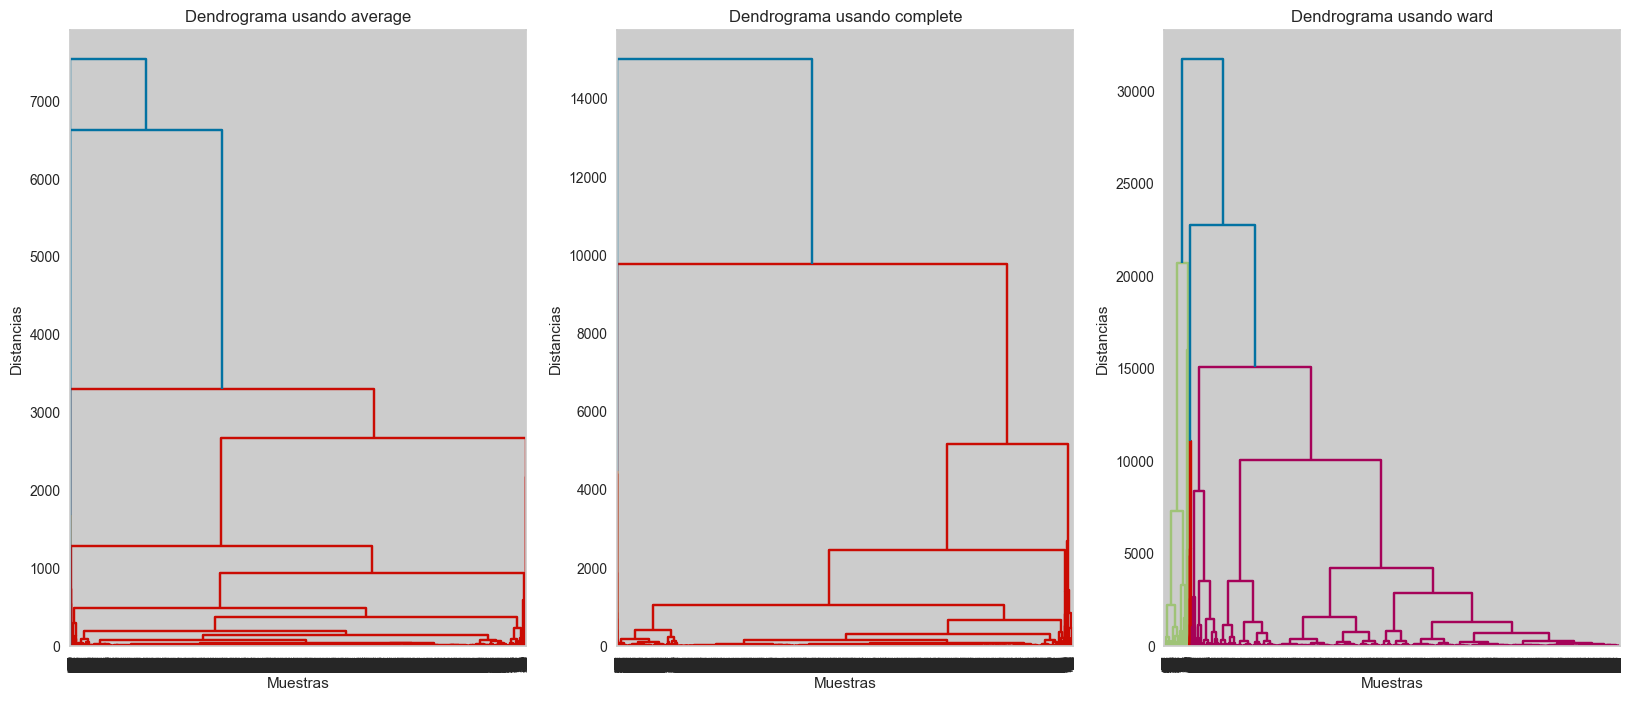

In [8]:
# GestorCluster.visualizar_dendrogramas()

In [11]:
df_aglomerativo = GestorCluster.modelo_aglomerativo(3, "ward", df)
df_aglomerativo.head()

,Order Date,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Order Priority,Profit_respuesta,clusters_kmeans,clusters_agglomerative
0,0.000565,0.052661,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,4.231596,1.546227,-0.673210,15.833395,0.076662,762.1845,2,0
1,0.000858,0.200994,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,7.102511,2.423903,-0.202129,15.659911,0.076662,-288.7650,1,1
2,0.000565,0.146325,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,10.108857,2.423903,-0.202129,15.517842,0.573855,919.9710,2,0
3,0.000702,0.146325,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,5.427057,0.668550,-0.202129,15.424817,0.573855,-96.5400,1,1
4,0.001228,0.052661,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,5.304919,1.985065,-0.673210,15.300550,0.076662,311.5200,2,0


In [12]:
df_aglomerativo.shape

(51290, 20)

In [ ]:
# Configuraciones de vinculación y métricas de distancia
linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'cosine', 'chebyshev']

# Crear un DataFrame para almacenar los resultados
results = []

# Suponiendo que tienes un DataFrame llamado df_copia
# Aquí df_copia debería ser tu conjunto de datos
# Asegúrate de que esté preprocesado adecuadamente (normalizado si es necesario)

for linkage_method in linkage_methods:
    for metric in distance_metrics:
        for cluster in range(3,10):
            try:
                # Configurar el modelo de AgglomerativeClustering
                modelo = AgglomerativeClustering(
                    linkage=linkage_method,
                    metric=metric,  
                    distance_threshold=None,  # Para buscar n_clusters
                    n_clusters=cluster, # Cambia esto según tu análisis
                )
                
                # Ajustar el modelo
                labels = modelo.fit_predict(df_copia)

                # Calcular métricas si hay más de un cluster
                if len(np.unique(labels)) > 1:
                    # Silhouette Score
                    silhouette_avg = silhouette_score(df_copia, labels, metric=metric)

                    # Davies-Bouldin Index
                    db_score = davies_bouldin_score(df_copia, labels)

                    
                    # Cardinalidad (tamaño de cada cluster)
                    cluster_cardinality = {cluster: sum(labels == cluster) for cluster in np.unique(labels)}
                else:
                    inertia = float('inf')
                    cluster_cardinality = {'Cluster único': len(df_copia)}

                # Almacenar resultados
                results.append({
                    'linkage': linkage_method,
                    'metric': metric,
                    'silhouette_score': silhouette_avg,
                    'davies_bouldin_index': db_score,
                    'cluster_cardinality': cluster_cardinality,
                    'n_cluster': cluster
                })

            except Exception as e:
                print(f"Error con linkage={linkage_method}, metric={metric}: {e}")

# Crear DataFrame de resultados
results_df = pd.DataFrame(results)

# Mostrar resultados ordenados por silhouette_score
results_df = results_df.sort_values(by='silhouette_score', ascending=False)

# Mostrar el DataFrame
results_df.head(20)